In [2]:
%run init.ipynb

# Quando faltarão UTIs?!
Em https://youtu.be/sKwBqn0mVxs, Vitor de Souza mostrou uma análise interessante dos dados sobre a evolução dos casos de covid-19 no Brasil e em São Paulo. Essa análise o permitiu estimar quanto tempo falta para que o número de pacientes precisando de uma Unidade de Terapia Intensiva (UTI) iguale o número de UTIs disponíveis em SP. Aqui faço o mesmo para o estado do Rio Grande do Sul e para a cidade de Santa Maria.

## Brasil
Antes de lidar para os dados do nosso estado, vamos olhar para os gráficos do Brasil, com dados obtidos em [https://www.ufsm.br/coronavirus/brasil/]. O Brasil dispõe de 48848 UTIs [https://www.bbc.com/portuguese/brasil-52137553].

In [18]:
csvf = csv.reader(open('covid19_brasil.csv')); datad = []; casosd = []; obitosd = []
for row in csvf:
    datad.append(row[0]); casosd.append(row[1]); obitosd.append(row[2])
ndias = len(datad)-1; print('No. de dias desde '+datad[1]+' = ',ndias); print('Data = ', datad[1:ndias+1])
casos = np.zeros(ndias); casos = np.array(casosd[1:ndias+1]); 
casos = np.asfarray(casos,float); print('No. de casos = ', casos.astype(int))
obitos = np.zeros(ndias); obitos = np.array(obitosd[1:ndias+1]); 
obitos = np.asfarray(obitos,float); print('No. de óbitos = ', obitos.astype(int))
dia = np.zeros(ndias,dtype='int'); lim_caos = 21333
for j in range(0,ndias):
    dia[j] = j+1
log10casos = np.log10(casos)

No. de dias desde Mar 7, 2020 =  53
Data =  ['Mar 7, 2020', 'Mar 8, 2020', 'Mar 9, 2020', 'Mar 10, 2020', 'Mar 11, 2020', 'Mar 12, 2020', 'Mar 13, 2020', 'Mar 14, 2020', 'Mar 15, 2020', 'Mar 16, 2020', 'Mar 17, 2020', 'Mar 18, 2020', 'Mar 19, 2020', 'Mar 20, 2020', 'Mar 21, 2020', 'Mar 22, 2020', 'Mar 23, 2020', 'Mar 24, 2020', 'Mar 25, 2020', 'Mar 26, 2020', 'Mar 27, 2020', 'Mar 28, 2020', 'Mar 29, 2020', 'Mar 30, 2020', 'Mar 31, 2020', 'Apr 1, 2020', 'Apr 2, 2020', 'Apr 3, 2020', 'Apr 4, 2020', 'Apr 5, 2020', 'Apr 6, 2020', 'Apr 7, 2020', 'Apr 8, 2020', 'Apr 9, 2020', 'Apr 10, 2020', 'Apr 11, 2020', 'Apr 12, 2020', 'Apr 13, 2020', 'Apr 14, 2020', 'Apr 15, 2020', 'Apr 16, 2020', 'Apr 17, 2020', 'Apr 18, 2020', 'Apr 19, 2020', 'Apr 20, 2020', 'Apr 21, 2020', 'Apr 22, 2020', 'Apr 23, 2020', 'Apr 24, 2020', 'Apr 25, 2020', 'Apr 26, 2020', 'Apr 27, 2020', 'Apr 28, 2020']
No. de casos =  [   19    25    25    34    52    77    98   121   200   234   291   428
   621   904  1128  1546  1891

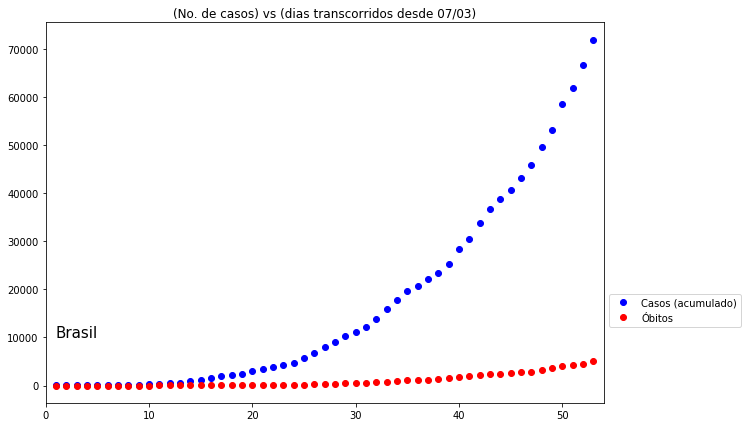

In [19]:
fig = plt.figure(figsize=(10,7))
plt.plot(dia,casos,'o',color='blue'); plt.plot(dia,obitos,'o',color='red')
plt.xlim(0,ndias+1)#; plt.ylim(1,lim_caos)
plt.title('(No. de casos) vs (dias transcorridos desde 07/03)')
plt.annotate('Brasil', xy=(1,10000), xytext=(1,10000), fontsize=15,color='black')
plt.legend(('Casos (acumulado)','Óbitos'),loc=(1.01,0.2))
plt.show()

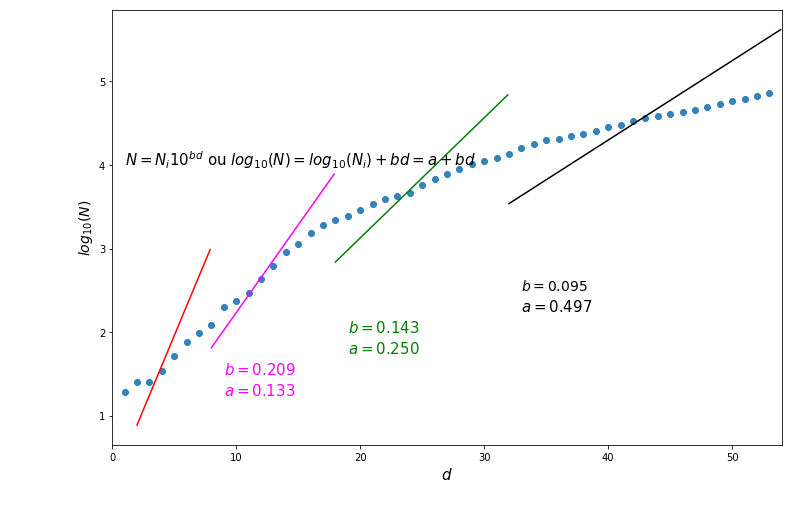

In [20]:
# Intervalos para o fit linear
# Fase de instalação
diai = dia[1]; diaf = dia[6]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ai = p[1]; bi = p[0]#; print('ai = ',ai,' bi = ',bi)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0i = np.zeros(nx0); y0i = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0i[j] = diai+j*dx0; y0i[j] = ai + bi*x0i[j]#; print(x0[j],y0[j])
    
# Fase de expanção livre
diai = dia[7]; diaf = dia[16]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ael = p[1]; bel = p[0]#; print('ael = ',ael,' bl = ',bel)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0el = np.zeros(nx0); y0el = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0el[j] = diai+j*dx0; y0el[j] = ael + bel*x0el[j]#; print(x0[j],y0[j])
    
# Fase de expanção contida
diai = dia[17]; diaf = dia[30]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); aec = p[1]; bec = p[0]#; print('aec = ',aec,' bec = ',bec)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0ec = np.zeros(nx0); y0ec = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0ec[j] = diai+j*dx0; y0ec[j] = aec + bec*x0ec[j]#; print(x0[j],y0[j])
    
# Fase de desaceleração
diai = dia[31]; diaf = dia[ndias-1]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ad = p[1]; bd = p[0]#; print('ad = ',ad,' bd = ',bd)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0d = np.zeros(nx0); y0d = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0d[j] = diai+j*dx0; y0d[j] = ad + bd*x0d[j]#; print(x0d[j],y0d[j])

fig = plt.figure(figsize=(12,8))
plt.plot(dia,log10casos,'o',alpha=0.9)
plt.plot(x0i,y0i,color='red'); plt.plot(x0el,y0el,color='magenta')
plt.plot(x0ec,y0ec,color='green'); plt.plot(x0d,y0d,color='black')
plt.xlim(0,ndias+1)#; plt.ylim(-0.1,math.log10(lim_caos))
plt.xlabel(r'$d$', fontsize=15); plt.ylabel(r'$log_{10}(N)$', fontsize=14)
plt.annotate(r'$N=N_{i}10^{bd}$ ou $log_{10}(N)=log_{10}(N_{i})+bd=a+bd$', xy=(1,4), xytext=(1,4), fontsize=15)
plt.annotate(r'$b=$'+str(bi)[:5], xy=(3,0.5), xytext=(3,0.5), fontsize=15,color='red')
plt.annotate(r'$a=$'+str(ai)[:5], xy=(3,0.25), xytext=(3,0.25), fontsize=15,color='red')
plt.annotate(r'$b=$'+str(bel)[:5], xy=(9,1.5), xytext=(9,1.5), fontsize=15,color='magenta')
plt.annotate(r'$a=$'+str(ael)[:5], xy=(9,1.25), xytext=(9,1.25), fontsize=15,color='magenta')
plt.annotate(r'$b=$'+str(bec)[:5], xy=(19,2), xytext=(19,2), fontsize=15,color='green')
plt.annotate(r'$a=$'+str(aec)[:5], xy=(19,1.75), xytext=(19,1.75), fontsize=15,color='green')
plt.annotate(r'$b=$'+str(bd)[:5], xy=(33,2.5), xytext=(33,2.5), fontsize=14,color='black')
plt.annotate(r'$a=$'+str(ad)[:5], xy=(33,2.25), xytext=(33,2.25), fontsize=15,color='black')
plt.annotate('Brasil', xy=(dia[ndias-13],0), xytext=(dia[ndias-13],0), fontsize=15,color='black')
plt.show()

## Rio Grande do Sul
O número de leitos de UTI disponíveis atualmente no RS [https://gauchazh.clicrbs.com.br/saude/noticia/2020/03/com-poucos-leitos-de-uti-rio-grande-do-sul-se-prepara-para-tratar-casos-graves-de-coronavirus-ck87j7jbr01iq01rz0gpv1fpx.html]:
\begin{equation}
UTIs = 3200.
\end{equation}
Se 15% dos casos de covid-19 precisam de UTI, a partir de um número de casos igual a
\begin{equation}
\frac{(3200)(100)}{15} \approx 21333
\end{equation}
entraremos no regime caótico em que pessoas precisando de UTI não terão com ser atendidas (100% da UTIs estarão ocupadas). Notemos que esse número corresponde a somente $\frac{(21333)(100)}{11300000}\approx 0,18\text{ %}$ da população gaúcha.

In [134]:
(3200*100)/15, (21333*100)/11300000

Abaixo estão dados do número de casos de covid-19 no RS obtidos em [https://www.ufsm.br/coronavirus/rio-grande-do-sul/]:

In [15]:
csvf = csv.reader(open('covid19_rs.csv')); datad = []; casosd = []; obitosd = []
for row in csvf:
    datad.append(row[0]); casosd.append(row[1]); obitosd.append(row[2])
ndias = len(datad)-1; print('No. de dias desde '+datad[1]+' = ',ndias); print('Data = ', datad[1:ndias+1])
casos = np.zeros(ndias); casos = np.array(casosd[1:ndias+1]); 
casos = np.asfarray(casos,float); print('No. de casos = ', casos.astype(int))
obitos = np.zeros(ndias); obitos = np.array(obitosd[1:ndias+1]); 
obitos = np.asfarray(obitos,float); print('No. de óbitos = ',obitos.astype(int))
dia = np.zeros(ndias,dtype='int'); lim_caos = 21333
for j in range(0,ndias):
    dia[j] = j+1
log10casos = np.zeros(ndias)
for j in range(0,ndias):
    if casos[j] == 0:
        log10casos[j] = 0
    else:
        log10casos[j] = math.log10(casos[j])

No. de dias desde Mar 7, 2020 =  52
Data =  ['Mar 7, 2020', 'Mar 8, 2020', 'Mar 9, 2020', 'Mar 10, 2020', 'Mar 11, 2020', 'Mar 12, 2020', 'Mar 13, 2020', 'Mar 14, 2020', 'Mar 15, 2020', 'Mar 16, 2020', 'Mar 17, 2020', 'Mar 18, 2020', 'Mar 19, 2020', 'Mar 20, 2020', 'Mar 21, 2020', 'Mar 22, 2020', 'Mar 23, 2020', 'Mar 24, 2020', 'Mar 25, 2020', 'Mar 26, 2020', 'Mar 27, 2020', 'Mar 28, 2020', 'Mar 29, 2020', 'Mar 30, 2020', 'Mar 31, 2020', 'Apr 1, 2020', 'Apr 2, 2020', 'Apr 3, 2020', 'Apr 4, 2020', 'Apr 5, 2020', 'Apr 6, 2020', 'Apr 7, 2020', 'Apr 8, 2020', 'Apr 9, 2020', 'Apr 10, 2020', 'Apr 11, 2020', 'Apr 12, 2020', 'Apr 13, 2020', 'Apr 14, 2020', 'Apr 15, 2020', 'Apr 16, 2020', 'Apr 17, 2020', 'Apr 18, 2020', 'Apr 19, 2020', 'Apr 20, 2020', 'Apr 21, 2020', 'Apr 22, 2020', 'Apr 23, 2020', 'Apr 24, 2020', 'Apr 25, 2020', 'Apr 26, 2020', 'Apr 27, 2020']
No. de casos =  [   0    0    0    1    2    4    4    6    6    6   10   19   28   37
   60   72   86   98  123  168  195  197  226  2

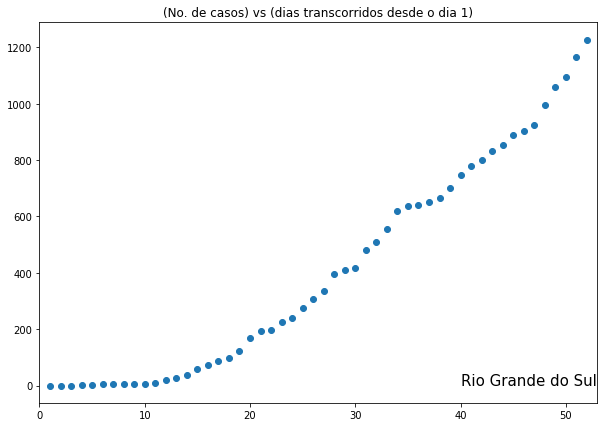

In [16]:
fig = plt.figure(figsize=(10,7))
plt.plot(dia,casos,'o')
plt.xlim(0,ndias+1)#; plt.ylim(1,lim_caos)
plt.title('(No. de casos) vs (dias transcorridos desde o dia 1)')
plt.annotate('Rio Grande do Sul', xy=(dia[ndias-13],1), xytext=(dia[ndias-13],1), fontsize=15,color='black')
plt.show()

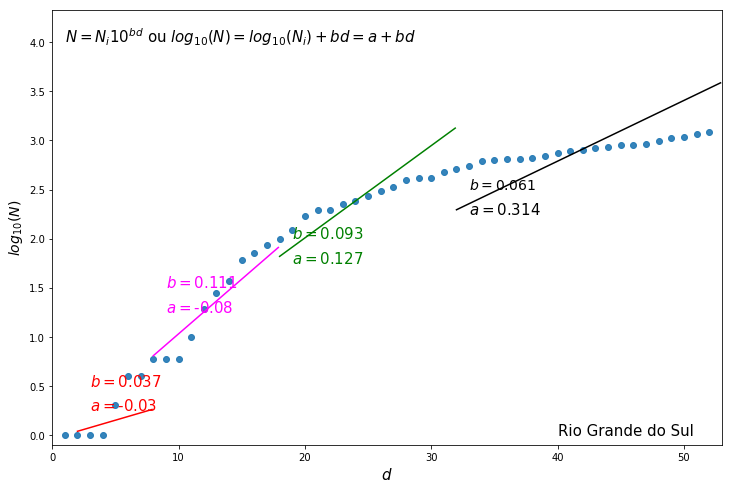

In [137]:
# Intervalos para o fit linear
# Fase de instalação
diai = dia[1]; diaf = dia[6]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ai = p[1]; bi = p[0]#; print('ai = ',ai,' bi = ',bi)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0i = np.zeros(nx0); y0i = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0i[j] = diai+j*dx0; y0i[j] = ai + bi*x0i[j]#; print(x0[j],y0[j])
    
# Fase de expanção livre
diai = dia[7]; diaf = dia[16]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ael = p[1]; bel = p[0]#; print('ael = ',ael,' bl = ',bel)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0el = np.zeros(nx0); y0el = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0el[j] = diai+j*dx0; y0el[j] = ael + bel*x0el[j]#; print(x0[j],y0[j])
    
# Fase de expanção contida
diai = dia[17]; diaf = dia[30]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); aec = p[1]; bec = p[0]#; print('aec = ',aec,' bec = ',bec)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0ec = np.zeros(nx0); y0ec = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0ec[j] = diai+j*dx0; y0ec[j] = aec + bec*x0ec[j]#; print(x0[j],y0[j])
    
# Fase de desaceleração
diai = dia[31]; diaf = dia[ndias-1]
nx = diaf-diai+1; x = np.zeros(nx); f = np.zeros(nx)#; print(diai,diaf,nx)
j = 0
while j+diai < diaf-1:
    x[j] = dia[j+diai-1]; f[j] = log10casos[j+diai-1]#; print(j,x[j],f[j])
    j += 1
p = np.polyfit(x, f, 1); ad = p[1]; bd = p[0]#; print('ad = ',ad,' bd = ',bd)
nx0 = nx*10; dx0 = (diaf-diai+1)/nx0; x0d = np.zeros(nx0); y0d = np.zeros(nx0)#; print(nx0,dx0)
for j in range(0,nx0):
    x0d[j] = diai+j*dx0; y0d[j] = ad + bd*x0d[j]#; print(x0d[j],y0d[j])

fig = plt.figure(figsize=(12,8))
plt.plot(dia,log10casos,'o',alpha=0.9)
plt.plot(x0i,y0i,color='red'); plt.plot(x0el,y0el,color='magenta')
plt.plot(x0ec,y0ec,color='green'); plt.plot(x0d,y0d,color='black')
plt.xlim(0,ndias+1); plt.ylim(-0.1,math.log10(lim_caos))
plt.xlabel(r'$d$', fontsize=15); plt.ylabel(r'$log_{10}(N)$', fontsize=14)
plt.annotate(r'$N=N_{i}10^{bd}$ ou $log_{10}(N)=log_{10}(N_{i})+bd=a+bd$', xy=(1,4), xytext=(1,4), fontsize=15)
plt.annotate(r'$b=$'+str(bi)[:5], xy=(3,0.5), xytext=(3,0.5), fontsize=15,color='red')
plt.annotate(r'$a=$'+str(ai)[:5], xy=(3,0.25), xytext=(3,0.25), fontsize=15,color='red')
plt.annotate(r'$b=$'+str(bel)[:5], xy=(9,1.5), xytext=(9,1.5), fontsize=15,color='magenta')
plt.annotate(r'$a=$'+str(ael)[:5], xy=(9,1.25), xytext=(9,1.25), fontsize=15,color='magenta')
plt.annotate(r'$b=$'+str(bec)[:5], xy=(19,2), xytext=(19,2), fontsize=15,color='green')
plt.annotate(r'$a=$'+str(aec)[:5], xy=(19,1.75), xytext=(19,1.75), fontsize=15,color='green')
plt.annotate(r'$b=$'+str(bd)[:5], xy=(33,2.5), xytext=(33,2.5), fontsize=14,color='black')
plt.annotate(r'$a=$'+str(ad)[:5], xy=(33,2.25), xytext=(33,2.25), fontsize=15,color='black')
plt.annotate('Rio Grande do Sul', xy=(dia[ndias-13],0), xytext=(dia[ndias-13],0), fontsize=15,color='black')
plt.show()

## Santa Maria
Para Santa Maria usamos dados obtidos em [https://www.ufsm.br/coronavirus/observatorio/].

In [12]:
csvf = csv.reader(open('covid19_sm.csv')); datad = []; casosd = []
for row in csvf:
    datad.append(row[0]); casosd.append(row[1])
ndias = len(datad)-1; print('No. de dias desde '+datad[1]+' = ',ndias); print('Data = ',datad[1:ndias+1])
casos = np.zeros(ndias); casos = np.array(casosd[1:ndias+1])
casos = np.asfarray(casos,float); print('No. casos = ',casos.astype(int))
obitos = np.zeros(ndias); obitos = np.array(obitosd[1:ndias+1]); 
obitos = np.asfarray(obitos,float); print('No. de óbtos = ', obitos.astype(int))

No. de dias desde Mar 20, 2020 =  14
Data =  ['Mar 20, 2020', 'Mar 21, 2020', 'Mar 27, 2020', 'Mar 28, 2020', 'Apr 3, 2020', 'Apr 7, 2020', 'Apr 8, 2020', 'Apr 12, 2020', 'Apr 13, 2020', 'Apr 14, 2020', 'Apr 17, 2020', 'Apr 19, 2020', 'Apr 24, 2020', 'Apr 26, 2020']
No. casos =  [4 1 1 1 1 1 1 3 6 4 1 2 1 1]
No. de óbtos =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Os dados para Santa Maria são para os casos indentificados no dia, e faltam dados na  tabela para os dias que não houve casos, por isso completamos essa tabela abaixo:

In [130]:
diario = [4,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,3,6,4,0,0,1,0,2,0,0,0,0,1,0,1]
ndias = len(diario); print('No. de dias desde '+datad[1]+' = ',ndias)
casos = np.zeros(ndias); casos[0] = diario[0]
for j in range(1,ndias):
    casos[j] = casos[j-1] + diario[j]
print(casos)
dia = np.zeros(ndias,dtype='int')#; lim_caos = 21333
for j in range(0,ndias):
    dia[j] = j+1
log10casos = np.zeros(ndias)
for j in range(0,ndias):
    if casos[j] == 0:
        log10casos[j] = 0
    else:
        log10casos[j] = math.log10(casos[j])

No. de dias desde Mar 20, 2020 =  38
[ 4.  5.  5.  5.  5.  5.  5.  6.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.
  9. 10. 10. 10. 10. 13. 19. 23. 23. 23. 24. 24. 26. 26. 26. 26. 26. 27.
 27. 28.]


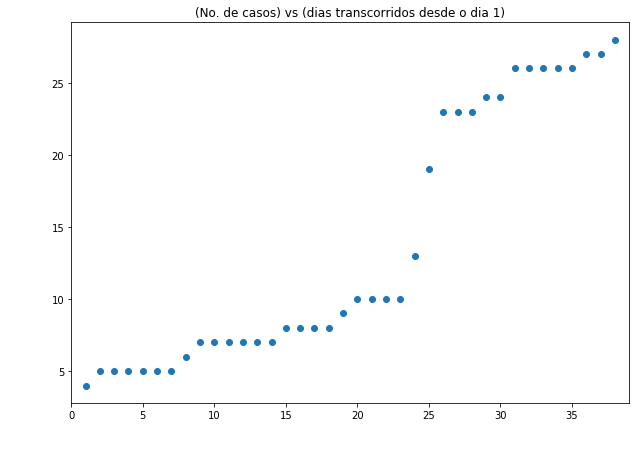

In [131]:
fig = plt.figure(figsize=(10,7))
plt.plot(dia,casos,'o')
plt.xlim(0,ndias+1)#; plt.ylim(1,lim_caos)
plt.title('(No. de casos) vs (dias transcorridos desde o dia 1)')
plt.annotate('Santa Maria', xy=(dia[ndias-13],1), xytext=(dia[ndias-13],1), fontsize=15,color='black')
plt.show()

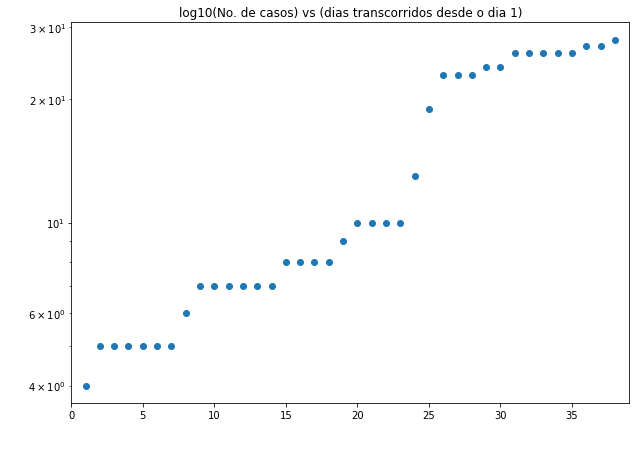

In [132]:
fig = plt.figure(figsize=(10,7))
plt.semilogy(dia,casos,'o')
plt.xlim(0,ndias+1)#; plt.ylim(1,lim_caos)
plt.title('log10(No. de casos) vs (dias transcorridos desde o dia 1)')
plt.annotate('Santa Maria', xy=(dia[ndias-13],1), xytext=(dia[ndias-13],1), fontsize=15,color='black')
plt.show()